# EmoAtlas - Starting guide
<center><img src="https://raw.githubusercontent.com/Alfonsosemeraro/emoatlas/main/fig1_1500.png" style="width:700px;height:393px;"></center>

EmoAtlas is a Python library that checks against the input text, after having enriched it and structured as a semantic network, against the multilingual [NRC Lexicon](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm). The library is built upon the [Formamentis Networks](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0222870) from Stella et al. and the [PyPlutchik library](https://www.github.com/alfonsosemeraro/pyplutchik) (paper [here](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0256503)).

In particular, EmoAtlas offers two main functions, the first is to the first and most unique is to extract a Formamentis Network from the input text. The second is to plot the emotions associated with the text with the dyads Plutchik flower.

By combining these functions, the semantic and syntactic meaning of the text can be analysed in greater depth.

Table of contents:
1. [Setup](#setup)
2. [EmoScores](#using-emoScores)
3. [Creating FormaMentis Networks](#creating-formamentis-networks)
4. [Emotion Analysis](#plutchik)
5. [Dealing with text corpora](#text_corpora)

---
<a id='setup'></a>
# Setup

### Installation

To install this library, you can run this command:

```
>> pip install emoatlas
```

The package "spaCY" will require a language "pipeline" to be installed. 

The choice of this pipeline will be determined by your needs and the language you are interested in.


English
```
>> python -m spacy download en_core_web_lg
```
Italian
```
>> python -m spacy download it_core_news_lg
```

This library uses Natural Language Toolkit (NLTK) as a core dependency. If this is the first time you're using NLTK, you need to download its data depending on the language you are interested in.

In [1]:
import nltk
nltk.download('wordnet') #English
# nltk.download('omw-1.4') #Italian

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ricca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Google Colab:
If you are using Google Colab, you can use these lines to quickly install a working version of this package.

In [2]:
# !pip install -q git+https://github.com/alfonsosemeraro/emoatlas
# !python -m spacy download en_core_web_lg
# import nltk
# nltk.download('wordnet')

A Google Colab simple demo is also available [here](https://colab.research.google.com/drive/1qzymy0-5EXv3E6dQ0c_D3mv8tyvjSduX?usp=sharing).

---
<a id='using-emoScores'></a>
# Using EmoScores

To start using the library, it is necessary to import the following libraries:

In [3]:
from emoatlas import EmoScores


The EmoScores is the core of EmoAtlas. This package uses this class to understand how to associate emotion scores to each word. Many options are available ( different emotion lexicons, emotion models, lemmatization/stemming). ❗ **By Default, EmoAtlas uses the English language, the plutchik emotion model and implements lemmatization.** ❗

Stemming is the process of reducing words to their root form by removing suffixes. For example, the words "running" and "runs" would be reduced to the stem "run". 

**Lemmatization**, on the other hand, is the process of reducing words to their dictionary form, known as the lemma. For example, "am", "are", and "is" would all be lemmatized to "be".

The class EmoScores() has many options that we can use to personalize its usage, here's a short list of some of the most important attributes and methods:
- *language*: allows you to set which language you are going to analyze.
- .set_stemming_lemmatization(stem_or_lem='stemming'): that we cause to change the strategy to stemming.

All the other plots and analyses will be performed as EmoScores methods.

In [4]:
emos = EmoScores()

# If you are interested in Italian (requires to download the necessary nltk data):
# emos = EmoScores(language='italian')

---
<a id='creating-formamentis-networks'></a>
# Creating FormaMentis Networks

Once we have used EmoScores() to define how to classify emotions, we can use its methods to define a Formamentis Network which we can then use to visualize it.

In [5]:
sample_text = """In this text, we prefer dogs becase they are happy and dogs are positive.
Good dogs make good friends. Cats however are bad and have negative links. We dislike cats.
And even if some hounds can be aggressive, I do love our canine friends."""

In [6]:
fmnt = emos.formamentis_network(sample_text) 

# We will see that fmnt is a Named Tuple of edges and vertices.
print(fmnt)

FormamentisNetwork(edges=[('prefer', 'they'), ('text', 'we'), ('dog', 'they'), ('happy', 'they'), ('happy', 'prefer'), ('happy', 'we'), ('dog', 'prefer'), ('dog', 'positive'), ('dog', 'we'), ('positive', 'prefer'), ('positive', 'we'), ('dog', 'friend'), ('dog', 'good'), ('cat', 'link'), ('bad', 'link'), ('friend', 'hound'), ('canine', 'friend'), ('prefer', 'text'), ('dog', 'text'), ('prefer', 'we'), ('they', 'we'), ('dog', 'happy'), ('friend', 'good'), ('bad', 'cat'), ('link', 'negative'), ('cat', 'dislike'), ('dislike', 'we'), ('cat', 'we'), ('I', 'love'), ('friend', 'love'), ('hound', 'love'), ('aggressive', 'love'), ('canine', 'love'), ('aggressive', 'hound'), ('I', 'hound'), ('I', 'aggressive'), ('I', 'friend'), ('aggressive', 'friend'), ('I', 'canine'), ('dog', 'hound')], vertices=['we', 'text', 'cat', 'canine', 'negative', 'hound', 'dislike', 'happy', 'prefer', 'friend', 'bad', 'love', 'link', 'they', 'good', 'aggressive', 'positive', 'dog', 'I'])



The ```.formamentis_network()``` method has plenty of arguments for customizing its usage. The most important ones are related to the analysis of multiplexes.

In particular:
- *target_word*: requires a string. You can use it to analyze the tfmn of a single word.

These two arguments can be used together to represent non-syntactic relationships:

- *semantic_enrichment*: you can set it to either ```'synonyms'```, ```'hypernyms'``` or  ```['synonyms', 'hypernyms']``` if you are interested in representing also non-syntactic relationships.
- *multiplex*: **if you are using semantic_enrichment, it is required to set it to True. ❗** This argument allows the return different edgelists for different kind of edges (syntactic, synonyms, hypernyms). If this is set to False, there will be no distinction in the edgelist between syntactic and non-syntactic edges.

After creating a formamentis network, you can visualize it with ```.draw_formamentis().``` This method also has some arguments interesting arguments:

- *thickness*: That you can use to increase or decrease the visual thickness of the edges.
- *highlight*: To highlight certain words in your representation.
- *layout*:  Either "edge_bundling" for circular layout or "force_layout" for force-based layout.

These arguments can also be used to customize the transparency of the edges:
- *alpha_syntactic*: Alpha value for syntactic edges, must be between 0.0 and 1.0.
- *alpha_hypernyms*: Alpha value for hypernyms edges, must be between 0.0 and 1.0.
- *alpha_synonyms*: Alpha value for synonyms edges, must be between 0.0 and 1.0.

<div class="alert alert-block alert-info"> <b>A recap:</b> 


- ```.formamentis_network()``` is used to get the edgelist of the formamentis network.

- ```.draw_formamentis().``` is used to plot the edgelist.

Both of these methods have different arguments that we can use to customize the plot appearance.
 </div>

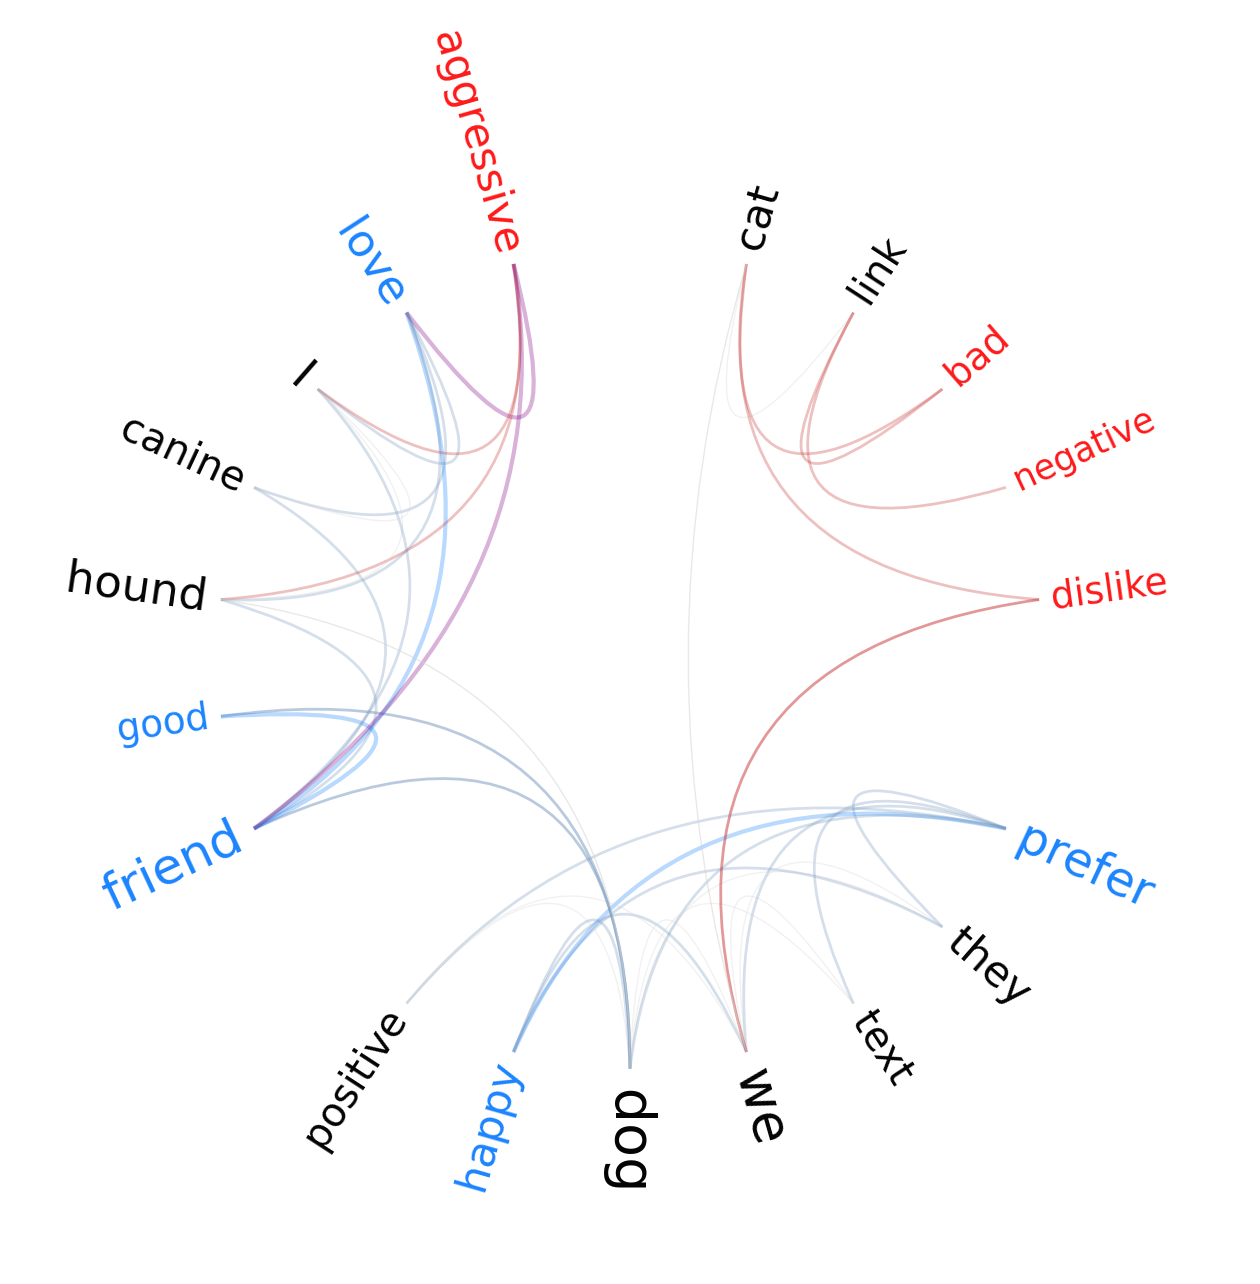

In [7]:
emos.draw_formamentis(fmnt)

A few more examples:

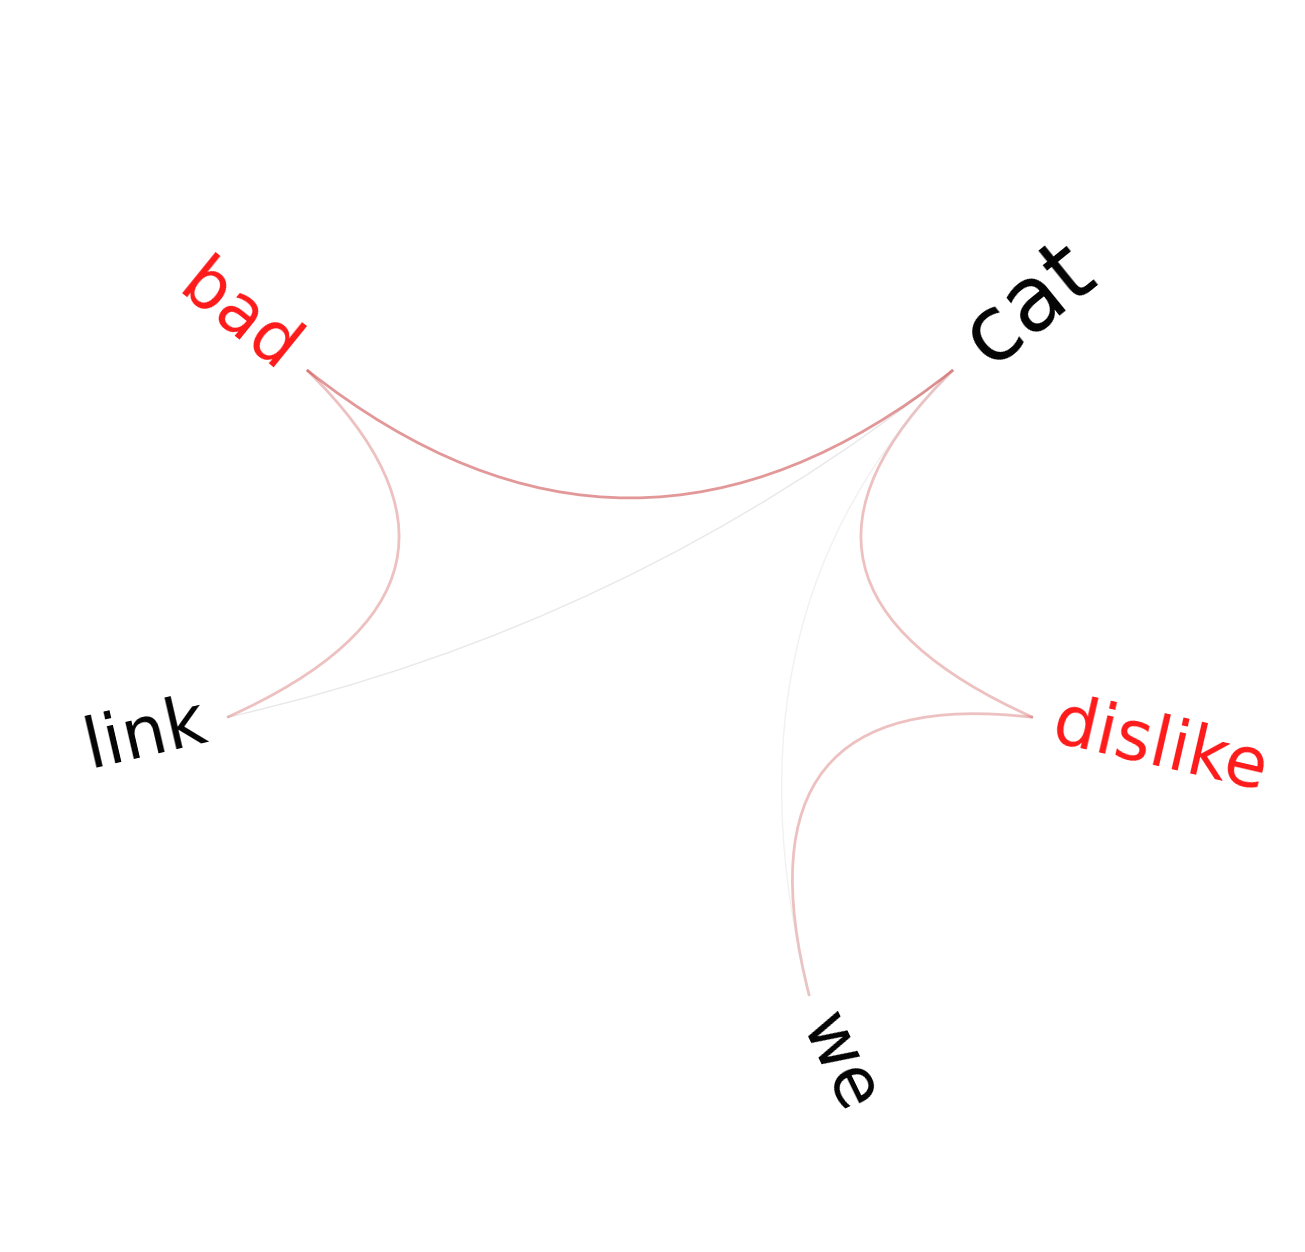

In [8]:
# Displaying a single word
fmnt = emos.formamentis_network(sample_text, target_word='cat') 
emos.draw_formamentis(fmnt)

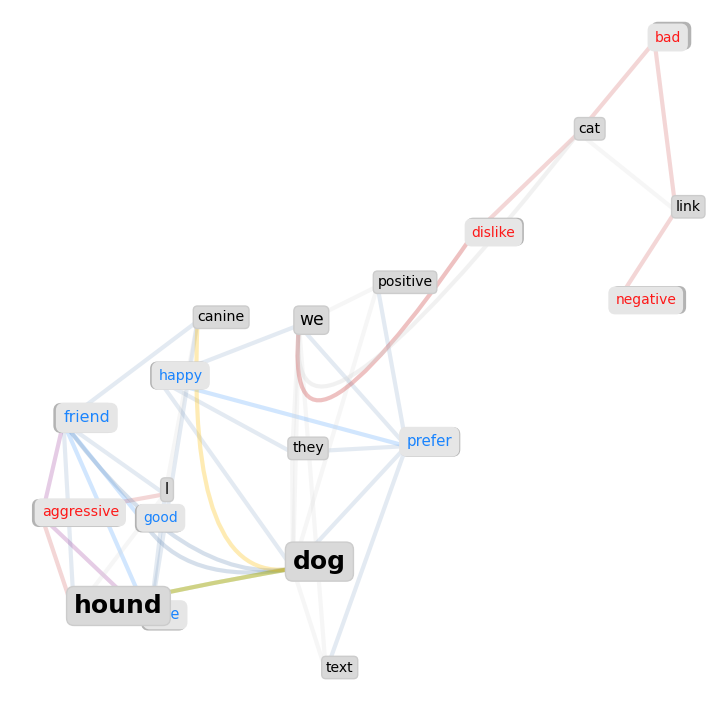

In [9]:
# Displaying different types of edges in a force layout.
fmnt = emos.formamentis_network(sample_text, semantic_enrichment=['synonyms','hypernyms'],multiplex=True) 
emos.draw_formamentis(fmnt, thickness=3, highlight=['dog','hound'],layout='force_layout')

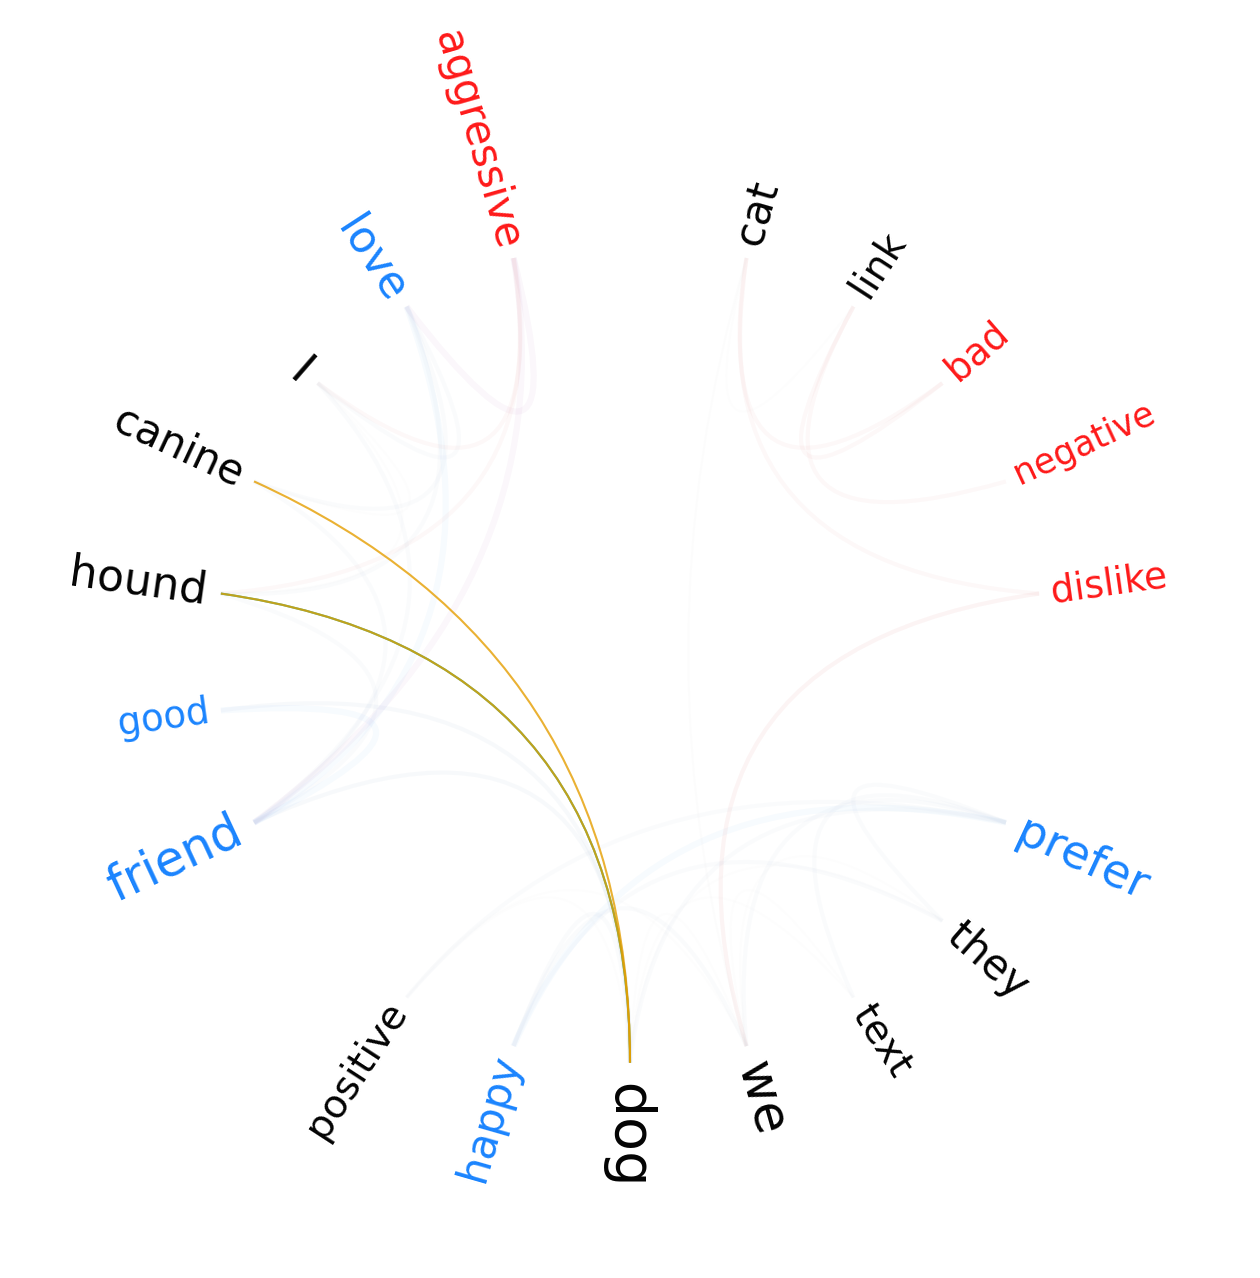

In [10]:
# Customizing transparency.
fmnt = emos.formamentis_network(sample_text, semantic_enrichment=['synonyms','hypernyms'],multiplex=True) 
emos.draw_formamentis(fmnt, thickness=1.5, alpha_syntactic = 0.05, alpha_hypernyms = 0.8, alpha_synonyms = 0.8)

-------
<a id='plutchik'></a>
# Emotion Analysis

Emoatlas also allows the Emotion detection of texts. It is suggested to refer to the paper to better understand how this analysis is performed.

A simple, basic function to display the plutchik flower is to use the following function:

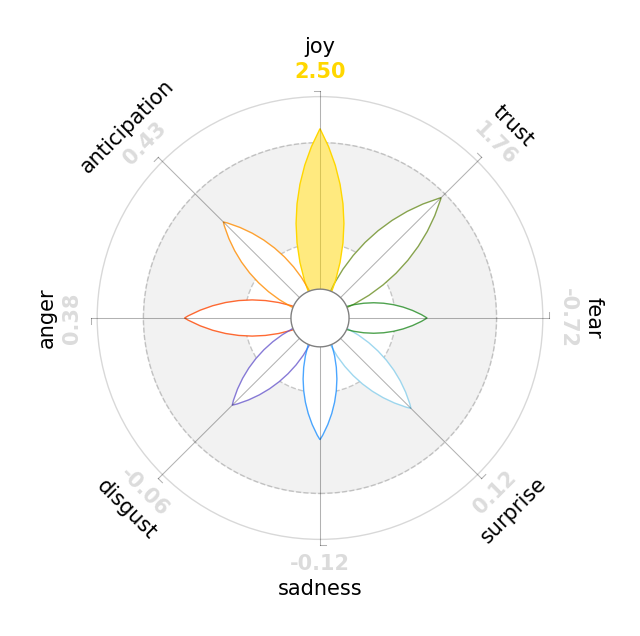

In [11]:
emos.draw_statistically_significant_emotions(sample_text)

Otherwise, it is possible to customize the visualization by computing the zscores with ```.zscores()``` and then using them as an argument for ```.draw_plutchik(zscores)``` as you can see in the code below.

The function ```.draw_plutchik()``` has many arguments, these are the most relevant:

- *rescale*: Either None or a 2-item tuple, with minimum and maximum value of the printable area.
- *reject_range*: A 2-item tuple. All petal scores that fall within the range must be considered non-interesting, thus drawed in grey. Default is None. **It is recommended to set it to [-1.96,1.96] to get statistically significant emotions.**
- *show_intensity_levels*: A string or a list of main emotions. It shows all three intensity scores for each emotion in the list, and for the others cumulative scores. Default is 'none'.
- *title*: Title for the plot.

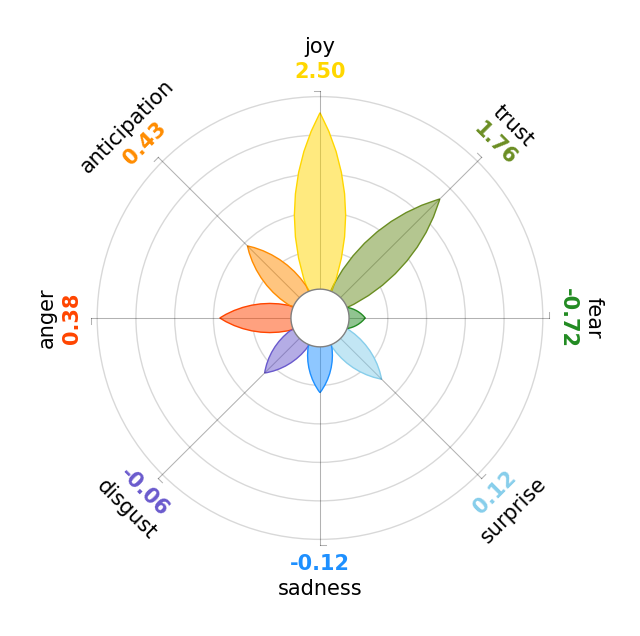

In [12]:
zscores = emos.zscores(sample_text)
emos.draw_plutchik(zscores)

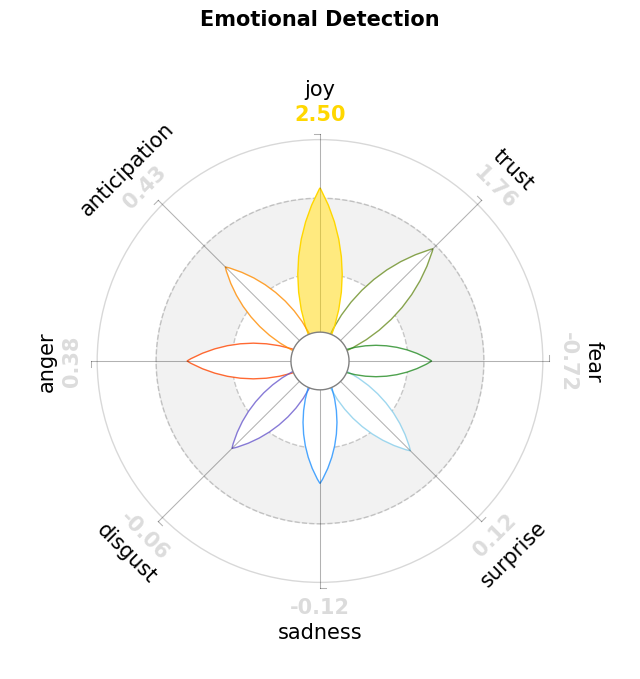

In [13]:
# An Example
emos.draw_plutchik(zscores, title='Emotional Detection', rescale=(-5,5), reject_range=[-1.96,1.96])

If you are interested in analysing the emotion of a single word, you can use the ```.draw_formamentis_flower()``` by using the argument *target_word*.

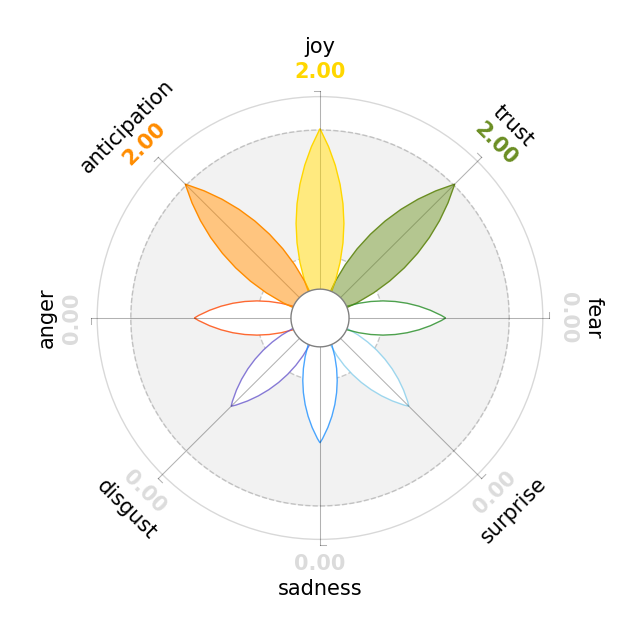

In [14]:
emos.draw_formamentis_flower(sample_text, target_word='dog')

---
# Dealing with text corpora
<a id='text_corpora'></a>

If you are interested in analyzing a corpus of text (that is - a collection of texts), the procedure is intuitive: you can merge all your strings into a single string and then you can analyse it.

In [15]:
sentences = [
    "While I admire the loyalty and enthusiasm of dogs, their constant barking sometimes disrupts my peaceful meditation sessions.",
    "The independent nature of cats appeals to my introverted side, but their occasional hairballs leave me wishing for a hypoallergenic companion.",
    "As much as I appreciate the playful nudges of dogs, their muddy paw prints on freshly cleaned floors test my patience.",
    "The soothing purr of a cat on my lap is undeniably calming, yet their knack for knocking things off shelves can be frustrating.",
    "Though both dogs and cats offer unique companionship, ultimately, my ideal pet would be a low-maintenance robot that dispenses affirmations and brews tea upon request."
]

sentence_to_analyze = ' '.join(sentences)


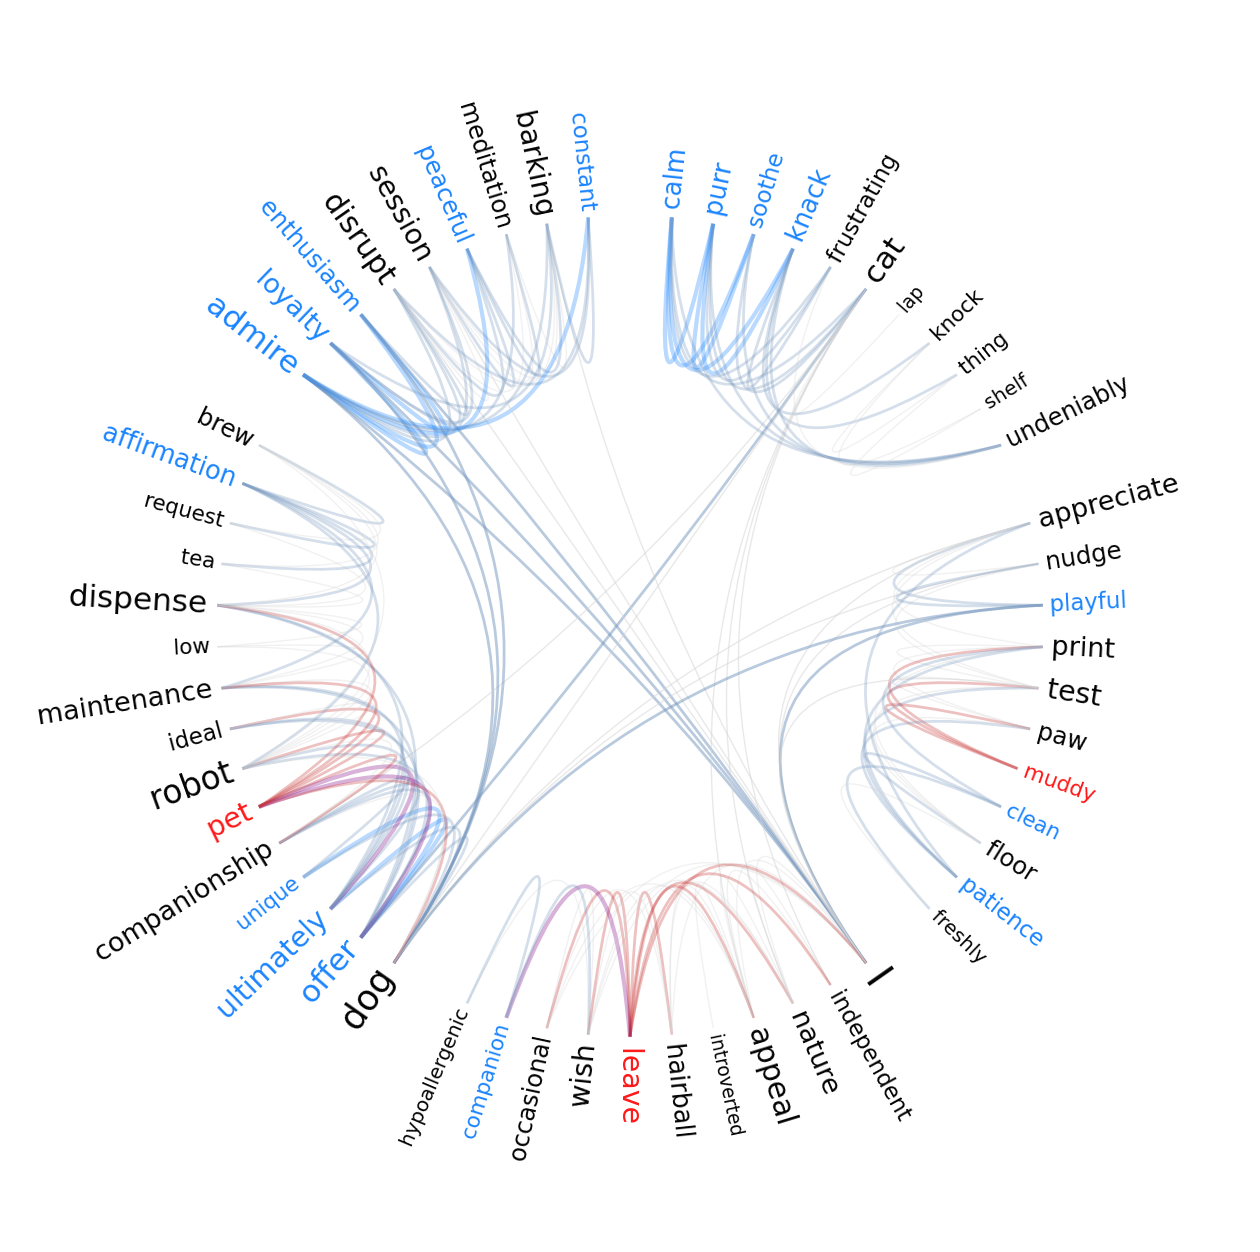

In [16]:
fmnt = emos.formamentis_network(sentence_to_analyze) 
emos.draw_formamentis(fmnt)

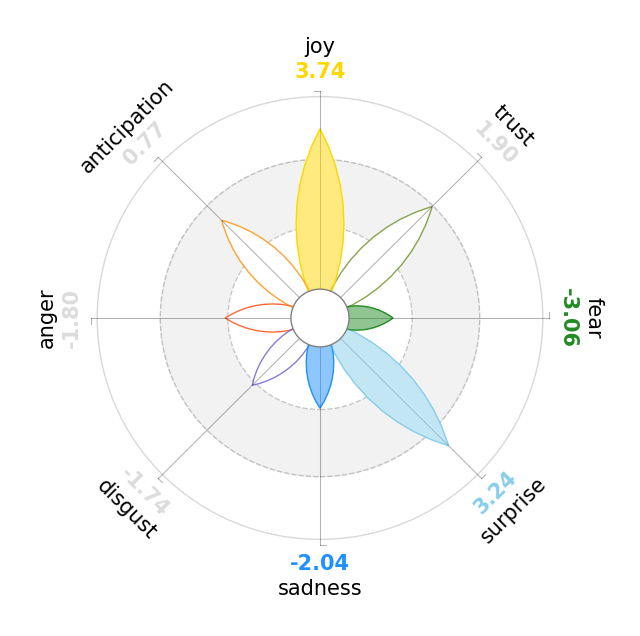

In [17]:
emos.draw_statistically_significant_emotions(sentence_to_analyze)